In [1]:
# from sentinelhub import SentinelHubRequest, DataCollection, MimeType, CRS, BBox, SHConfig
from dotenv import load_dotenv
# from pyproj import Transformer
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# import rasterio
# import folium

In [2]:
load_dotenv()  # charge automatiquement le .env du dossier courant

True

In [3]:
list_bbox_centers = [(43.52960344286241, 5.448962145567533),
(48.092094070852475, -1.7036876101196967),
 (48.121222106840435, -1.602864906604979),
 (45.74557103359813, 4.803091960652229),
 (47.8776770361181, -3.909947991759771),
 (44.55378060775165, 4.28389205759154),
 (45.69764498502806, 5.8945655967385315),
 (48.07500134978729, 7.3491231648955155),
 (50.63412206750312, 3.0435779303880106),
 (44.83078182200822, 0.5108123933396876)]

In [5]:
from urban_watch.ml_logic.data import make_bbox_global, get_data

data = get_data(list_bbox_centers)

In [ ]:
B2, B3, B4, B8, B11 = image[:,:,0], image[:,:,1], image[:,:,2], image[:,:,3], image[:,:,4]

# NDVI : (NIR - RED) / (NIR + RED) -- Représente la vegetation
NDVI = (B8 - B4) / (B8 + B4 + 1e-6)

# NDBI : (SWIR - NIR) / (SWIR + NIR). Représente les zones baties
NDBI = (B11 - B8) / (B11 + B8 + 1e-6)


In [ ]:
# Normalisation des bandes.
# CES VARIABLES SERONT LES FEATURES

# image_norm = (image - image.min()) / (image.max() - image.min())

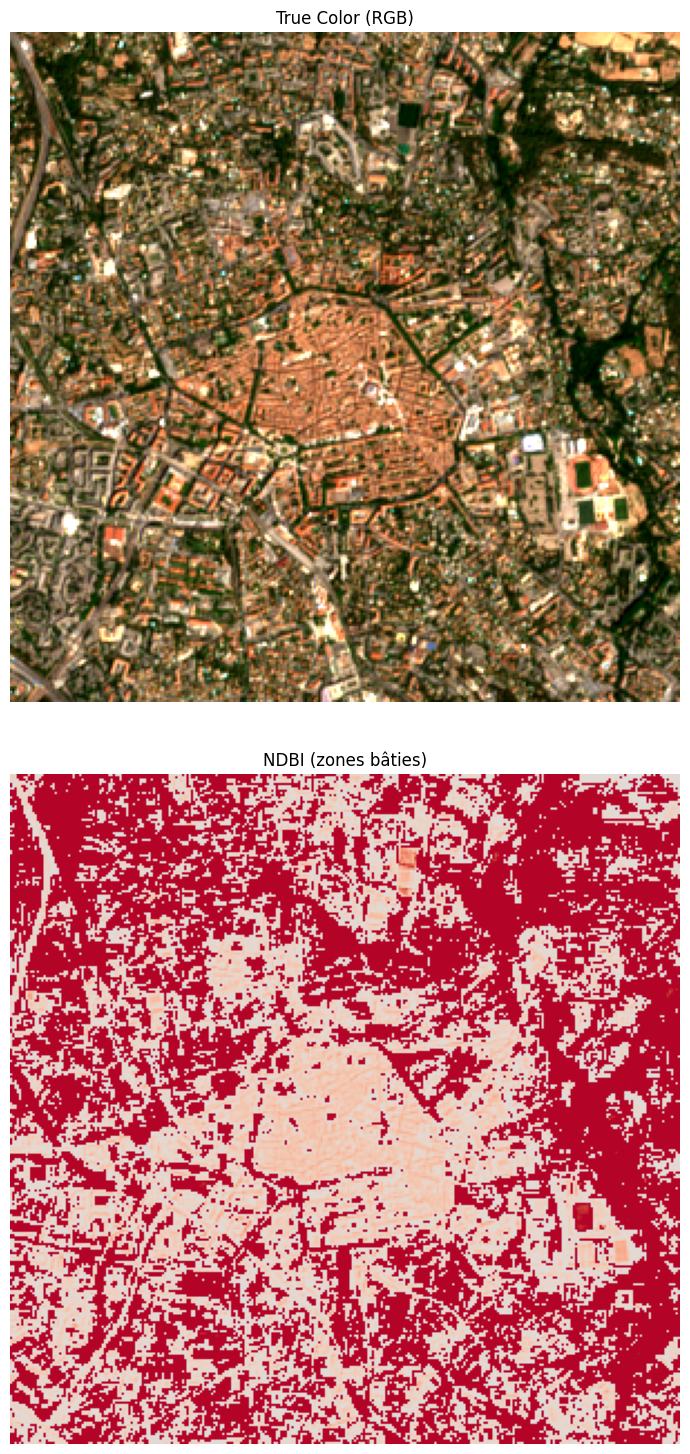

In [36]:
# True color (attention : nécessite une normalisation)
RGB = np.dstack([
    B4,
    B3,
    B2
]).astype(float)

# Normalisation 0-1 pour affichage (important !)
RGB = (RGB - RGB.min()) / (RGB.max() - RGB.min() + 1e-6)

# Normalisation par percentiles (évite que quelques pixels lumineux écrasent tout le contraste)
p2 = np.percentile(RGB, 2)
p98 = np.percentile(RGB, 98)

RGB_stretched = np.clip((RGB - p2) / (p98 - p2), 0, 1)

# Correction gamma (0.7–1.0 recommandé)
gamma = 0.8
RGB_corrected = np.clip(RGB_stretched ** gamma, 0, 1)


# Clip NDBI
NDBI = np.clip(NDBI, -1, 1)

plt.figure(figsize=(7, 15))

# --- TRUE COLOR ---
plt.subplot(2, 1, 1)
plt.title("True Color (RGB)")
plt.imshow(RGB_stretched)
plt.axis("off")

# --- NDBI ---
plt.subplot(2, 1, 2)
plt.title("NDBI (zones bâties)")
plt.imshow(NDBI, cmap="coolwarm", vmin=-1, vmax=1)
plt.axis("off")

plt.tight_layout()

plt.savefig("rgb_ndbi_comparison.png", dpi=300, bbox_inches='tight')

plt.show()